In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [24]:
from warnings import filterwarnings
filterwarnings('ignore')

### KNN

In [25]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

In [26]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


### Model & Tahmin

In [27]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [28]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [29]:
knn_model.n_neighbors

5

In [30]:
knn_model.metric

'minkowski'

In [31]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_init_params',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'p',
 'predict',
 'radius',
 'score',
 'set_params',
 'weights']

In [32]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [33]:
y_pred = knn_model.predict(X_test)

In [34]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

### Model Tuning

In [35]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [36]:
range(10)

range(0, 10)

In [37]:
RMSE =[]

for k in range(10):
    k = k+1
    knn_model =KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=",k,"için RMSE değeri:",rmse)

k= 1 için RMSE değeri: 455.03925390751965
k= 2 için RMSE değeri: 415.99629571490965
k= 3 için RMSE değeri: 420.6765370082348
k= 4 için RMSE değeri: 428.8564674588792
k= 5 için RMSE değeri: 426.6570764525201
k= 6 için RMSE değeri: 423.5071669008732
k= 7 için RMSE değeri: 414.9361222421057
k= 8 için RMSE değeri: 413.7094731463598
k= 9 için RMSE değeri: 417.84419990871265
k= 10 için RMSE değeri: 421.6252180741266


In [38]:
#GridSearchCV #hiperparametlerinin değerini değerlendiren fonksiyon

In [39]:
knn_params ={"n_neighbors":np.arange(1,30,1)}

In [40]:
knn = KNeighborsRegressor()

In [41]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [42]:
knn_cv_model.best_params_ #optimum parametre değeri

{'n_neighbors': 8}

In [43]:
#final model
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)

In [44]:
y_pred = knn_model.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test,y_pred))

421.6252180741266

### Destek Vektör Regresyonu (Support Vector Regression)

In [46]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

#### Model & Tahmin

In [47]:
svr_model = SVR("linear").fit(X_train,y_train)

In [48]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
svr_model.predict(X_train)[0:5]

array([219.32622169, 702.4303869 , 623.2055964 , 153.77538476,
       463.15190834])

In [50]:
svr_model.predict(X_test)[0:5]

array([679.14754685, 633.72883069, 925.68640849, 270.28463621,
       530.26659184])

In [51]:
svr_model.intercept_

array([-80.15196151])

In [52]:
svr_model.coef_

array([[ -1.21839037,   6.09602969,  -3.67574533,   0.14217075,
          0.51435919,   1.28388986,  12.55922537,  -0.08693755,
          0.46597184,   2.98259944,   0.52944523,  -0.79820799,
         -0.16015534,   0.30872794,   0.28842348,  -1.79560067,
          6.41868985, -10.74313783,   1.33374317]])

In [53]:
#test
y_pred=svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.04084185624924

#### Model Tuning

In [54]:
svr_model=SVR("linear")

In [55]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
svr_params = {"C": [0.1,0.5,1.3]}

In [35]:
svr_cv_model= GridSearchCV(svr_model,svr_params,cv=5).fit(X_train,y_train)

In [36]:
svr_cv_model.best_params_

{'C': 0.5}

In [39]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=5,verbose=2,n_jobs = -1).fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.0min finished


In [40]:
svr_cv_model.best_params_

{'C': 0.5}

In [41]:
svr_tuned = SVR("linear",C=0.5).fit(X_train,y_train)

In [42]:
y_pred = svr_tuned.predict(X_test)

In [43]:
np.sqrt(mean_squared_error(y_test,y_pred))

367.9874739022889

### Yapay Sinir Ağları

In [44]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

#### Model & Tahmin

In [56]:
scaler = StandardScaler() #standartlaştırma dönüştürme

In [57]:
scaler.fit(X_train) #train setini standartlaştırma
X_train_scaled = scaler.transform(X_train)

In [58]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [59]:
mlp_model = MLPRegressor().fit(X_train_scaled,y_train)

In [60]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [58]:
mlp_model.predict(X_test_scaled)[0:5]

array([25.04824699, 39.86148909, 78.63178895, 11.90479678, 28.52413532])

In [59]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

655.7165722558782

### Model Tuning

In [64]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [60]:
mlp_params = {"alpha": [0.1,0.01,0.02,0.001,0.0001], 
             "hidden_layer_sizes": [(10,20),(5,5),(100,100)]}

In [76]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv=5,verbose=2,n_jobs=-1).fit(X_train_scaled,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.4s finished


In [77]:
mlp_cv_model.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (100, 100)}

In [81]:
#final
mlp_tuned = MLPRegressor(alpha = 0.01,hidden_layer_sizes = (100,100)).fit(X_train_scaled,y_train)

In [82]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [83]:
np.sqrt(mean_squared_error(y_test,y_pred))

352.7511476764388

### CART (Classification and Regression Tree)

In [137]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

In [138]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [139]:
# model & tahmin

In [140]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10) #dallanma kontrolü parametresi, bölüm arttıkça arada kalan gözlem sayısı azalır

In [141]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

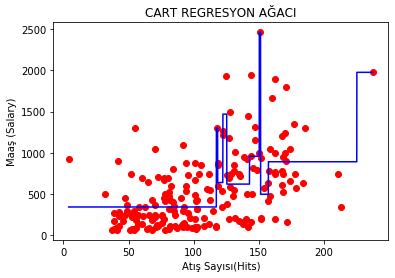

In [142]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid =X_grid.reshape((len(X_grid),1))

plt.scatter(X_train,y_train,color='red')

plt.plot(X_grid,cart_model.predict(X_grid),color='blue')

plt.title('CART REGRESYON AĞACI')
plt.xlabel('Atış Sayısı(Hits)')
plt.ylabel('Maaş (Salary)');

In [143]:
#tek değişkenli tahmin

In [144]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [145]:
y_pred =cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

In [146]:
# tüm değişkenler

In [147]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)

In [148]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

468.49579052913884

#### Model Tuning

In [149]:
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [150]:
cart_model = DecisionTreeRegressor(max_depth= 5).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

448.21200029739276

In [151]:
?cart_model

Type:        DecisionTreeRegressor
String form:
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_ <...> eight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
File:        c:\anaconda3\lib\site-packages\sklearn\tree\tree.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="mse")
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal node.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

splitter

In [152]:
cart_params = {"max_depth":[2,3,4,5,10,20],
               "min_samples_split":[2,10,5,30,50,10]}

In [153]:
cart_model = DecisionTreeRegressor()

In [154]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [155]:
cart_cv_model.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [158]:
#final model # 10,50 çıkmadı ama daha iyi sonucu bu veriyor

In [165]:
cart_tuned= DecisionTreeRegressor(max_depth=10,min_samples_split=50).fit(X_train,y_train)

In [166]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

421.25868329005385

### Random Forests

In [3]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

#### Model & Tahmin

In [4]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train) #farklı gözlem birimleri olmasın diye

In [5]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [6]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

373.04044281427

#### Model Tuning

In [9]:
rf_params = {"max_depth": [5,8,10],
            "max_features":[2,5,10],
            "n_estimators":[200,500,1000,2000],
            "min_samples_split":[2,10,80,100]}

In [10]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 24.7min finished


In [13]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [15]:
rf_model = RandomForestRegressor(random_state=42,
                                max_depth=8,
                                max_features=2,
                                min_samples_split=2,
                                n_estimators=200)
rf_tuned = rf_model.fit(X_train,y_train)

In [16]:
rf_tuned

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [18]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

348.2372919119422

### Değişken Önem Düzeyi

In [20]:
rf_tuned.feature_importances_*100

array([5.83939544, 6.29671412, 3.5548773 , 4.16102585, 4.66774588,
       4.98722442, 7.39418621, 9.74125251, 8.68525461, 7.86496982,
       8.76583148, 8.2943961 , 9.70887995, 4.70922791, 2.05255543,
       1.85359068, 0.3831876 , 0.56203099, 0.47765369])

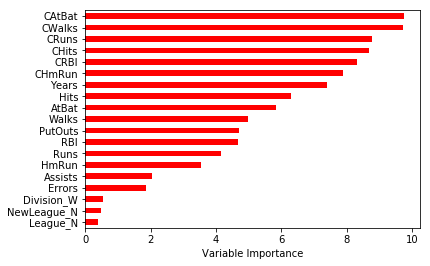

In [21]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},#
                         index= X_train.columns)

Importance.sort_values(by ='Importance', #importance sutununa göe sırala
                      axis=0,
                      ascending=True).plot(kind='barh',
                                          color='r',)

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

###  Gradient Boosting Machines

In [3]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

#### Model & Tahmin

In [4]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train) #model kurmak

In [5]:
gbm_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
y_pred = gbm_model.predict(X_test) #tahmin yapmak

In [9]:
np.sqrt(mean_squared_error(y_test,y_pred)) #tahmin sonucunu hesaplamak

344.32910827593

#### Model Tuning

In [10]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)
gbm_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
?gbm_model

Type:        GradientBoostingRegressor
String form:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
           <...> =1.0, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)
Length:      100
File:        c:\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py
Docstring:  
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
    loss function to be optimized. 'ls' refers to least squares
    regression. 'lad' (least absolute deviation) is a highly robust
    loss function solely based on order information of the input
    variables. 'huber' is a combination of the two. 'qu

In [13]:
gbm_params = {"learning_rate":[0.001,0.1,0.01],
             "max_depth":[3,5,8,],
             "n_estimators":[100,200,500],
             "subsample":[1,0.5,0.8],
             "loss":["ls","lad","quantile"]}

In [14]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [15]:
gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 13.9min finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 1}

In [62]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1,
                                     loss="lad",
                                     max_depth=3,
                                     n_estimators=200,
                                     subsample=1).fit(X_train,y_train)

In [63]:
y_pred = gbm_tuned.predict(X_test)

In [64]:
np.sqrt(mean_squared_error(y_test,y_pred))

323.071808585238

In [65]:
#değişken önem düzeyleri

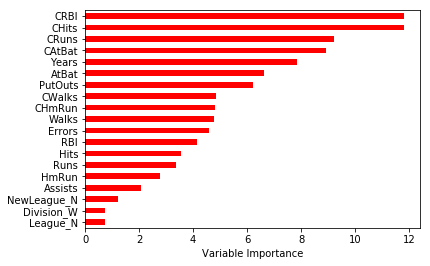

In [66]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100},
                         index= X_train.columns)

Importance.sort_values(by ='Importance', #importance sutununa göe sırala
                      axis=0,
                      ascending=True).plot(kind='barh',
                                          color='r',)

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### XGBoost

In [2]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

##### Model & Tahmin

In [3]:
!pip install xgboost

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [67]:
import xgboost

In [68]:
from xgboost import XGBRegressor

In [6]:
xgb = XGBRegressor().fit(X_train,y_train)

In [7]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [8]:
y_pred = xgb.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test,y_pred))

355.46515176059927

#### Model Tuning

In [11]:
xgb_params={"learning_rate": [0.1,0.01,0.5],
           "max_depth":[2,3,4,5,8],
           "n_estimators":[100,200,500,1000],
           "colsample_bytree":[0.4,0.7,1]}

In [12]:
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10, n_jobs=-1,verbose=2).fit(X_train,y_train) #cv=10 ,10 katlı çapraz doğrulama

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  6.0min finished


In [15]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [22]:
xgb_tuned= XGBRegressor(colsample_bytree=0.4,
                        learning_rate=0.1,
                        max_depth=2,
                        n_estimators=1000).fit(X_train,y_train)

In [23]:
y_pred= xgb_tuned.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test,y_pred))

367.8515299923177

### Light GBM

In [27]:
# Eğitim süresi uzun sürüyor
# daha performanslı
# level-wise büyüme stratejisi yerine leaf-wise büyüme stratejisi,daha iyi feed edebilmek
# breadth-first search (bfs) yerine depth-first search (dfs)

In [28]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

In [29]:
!pip install lightgbm

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [69]:
from lightgbm import LGBMRegressor

#### Model & Tahmin

In [32]:
lgb_model = LGBMRegressor().fit(X_train,y_train)

In [33]:
lgb_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [34]:
y_pred = lgb_model.predict(X_test)

In [35]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.8712087611089

#### Model Tuning

In [37]:
lgbm_params={"learning_rate":[0.01,0.1,0.5,1],
             "n_estimators":[20,40,100,200,500,1000],
            "max_depth":[1,2,3,4,5,6,7,8,9,10]}

In [38]:
lgbm_cv_model = GridSearchCV(lgb_model,
                            lgbm_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 721 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1086 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1643 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2219 tasks      | elapsed:  3.5min


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  3.8min finished


In [39]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [45]:
lgbm_tuned= LGBMRegressor(learning_rate=0.1,
                         max_depth=6,
                        n_estimators=20).fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [46]:
y_pred=lgbm_tuned.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test,y_pred))

371.5044868943621

### CatBoost

In [48]:
# Category Boosting
# kategorik değişkenler il e otomatik mücadele edebilen ,hızlı,başarılı bir diğer GBM türevi
# hızlı ve ölçeklenebilen gpu
# rusyanın ilk açık kaynak kodlu başarılı ML çalışması

In [2]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir
y = df["Salary"] #bağımlı değişkeni y diye kaydet
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #bağımlı ve kategorik değişkenleri dışarda bırak
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)#bağımsız değişkenleri toparla
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)#train ve test setleri oluşturma

In [3]:
!pip install catboost

  Using cached https://files.pythonhosted.org/packages/dd/6c/e2ab72e1b5730533a0980352816cc781351c21dfa5478b130d99d99d7ce2/catboost-0.24.4-cp37-none-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/86/86/89ba50ba65928001d3161f23bfa03945ed18ea13a1d1d44a772ff1fa4e7a/graphviz-0.16-py2.py3-none-any.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [70]:
from catboost import CatBoostRegressor

In [6]:
catb_model = CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 58.8ms	remaining: 58.7s
1:	learn: 432.4168868	total: 62.6ms	remaining: 31.2s
2:	learn: 426.3836690	total: 64.9ms	remaining: 21.6s
3:	learn: 420.2261014	total: 67.2ms	remaining: 16.7s
4:	learn: 414.9976675	total: 76.2ms	remaining: 15.2s
5:	learn: 409.6125323	total: 78.3ms	remaining: 13s
6:	learn: 403.9277911	total: 81ms	remaining: 11.5s
7:	learn: 398.4395285	total: 83.1ms	remaining: 10.3s
8:	learn: 392.4517081	total: 85.2ms	remaining: 9.38s
9:	learn: 387.4871123	total: 87.4ms	remaining: 8.65s
10:	learn: 382.6230510	total: 89.6ms	remaining: 8.06s
11:	learn: 378.1012454	total: 91.8ms	remaining: 7.55s
12:	learn: 372.6002306	total: 93.9ms	remaining: 7.13s
13:	learn: 368.4682192	total: 96.1ms	remaining: 6.77s
14:	learn: 364.0565766	total: 98.2ms	remaining: 6.45s
15:	learn: 359.5683249	total: 100ms	remaining: 6.17s
16:	learn: 355.1782794	total: 103ms	remaining: 5.93s
17:	learn: 350.4689946	total: 105ms	remaining: 5.71s
18:	learn: 346.

In [8]:
y_pred = catb_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test,y_pred))

350.2683163098795

#### Model Tuning

In [10]:
catb_params= {"iterations":[200,500,100],
              "learning_rate":[0.01,0.1],
              "depth":[3,6,8]}

In [11]:
catb_model = CatBoostRegressor()

In [12]:
catb_cv_model = GridSearchCV(catb_model,
                          catb_params,
                          cv=5,
                          n_jobs=-1,
                          verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.4min finished


0:	learn: 425.7900818	total: 1.25ms	remaining: 249ms
1:	learn: 404.8723520	total: 2.44ms	remaining: 241ms
2:	learn: 387.4057666	total: 3.35ms	remaining: 220ms
3:	learn: 372.2801584	total: 4.31ms	remaining: 211ms
4:	learn: 358.9204229	total: 5.3ms	remaining: 207ms
5:	learn: 347.0083933	total: 6.25ms	remaining: 202ms
6:	learn: 336.0130818	total: 7.19ms	remaining: 198ms
7:	learn: 324.3923300	total: 8.12ms	remaining: 195ms
8:	learn: 314.8690957	total: 9.1ms	remaining: 193ms
9:	learn: 308.5075563	total: 10ms	remaining: 191ms
10:	learn: 298.8587285	total: 11ms	remaining: 190ms
11:	learn: 294.7655438	total: 12ms	remaining: 189ms
12:	learn: 288.0697862	total: 13ms	remaining: 187ms
13:	learn: 282.6697154	total: 13.9ms	remaining: 184ms
14:	learn: 277.6121667	total: 14.8ms	remaining: 182ms
15:	learn: 273.4383979	total: 15.6ms	remaining: 180ms
16:	learn: 269.1556201	total: 16.8ms	remaining: 180ms
17:	learn: 264.8098704	total: 17.8ms	remaining: 180ms
18:	learn: 261.6700768	total: 18.7ms	remaining: 

In [13]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [15]:
catb_tuned = CatBoostRegressor(depth=3,iterations=500,learning_rate=0.1).fit(X_train,y_train)

0:	learn: 425.7900818	total: 1.39ms	remaining: 692ms
1:	learn: 404.8723520	total: 2.33ms	remaining: 580ms
2:	learn: 387.4057666	total: 3.21ms	remaining: 531ms
3:	learn: 372.2801584	total: 4.09ms	remaining: 507ms
4:	learn: 358.9204229	total: 4.94ms	remaining: 489ms
5:	learn: 347.0083933	total: 5.79ms	remaining: 477ms
6:	learn: 336.0130818	total: 6.64ms	remaining: 467ms
7:	learn: 324.3923300	total: 7.47ms	remaining: 460ms
8:	learn: 314.8690957	total: 8.35ms	remaining: 455ms
9:	learn: 308.5075563	total: 9.33ms	remaining: 457ms
10:	learn: 298.8587285	total: 10.3ms	remaining: 456ms
11:	learn: 294.7655438	total: 11.2ms	remaining: 455ms
12:	learn: 288.0697862	total: 12.2ms	remaining: 455ms
13:	learn: 282.6697154	total: 13.1ms	remaining: 454ms
14:	learn: 277.6121667	total: 14ms	remaining: 453ms
15:	learn: 273.4383979	total: 15.2ms	remaining: 460ms
16:	learn: 269.1556201	total: 16.2ms	remaining: 460ms
17:	learn: 264.8098704	total: 17.1ms	remaining: 458ms
18:	learn: 261.6700768	total: 17.9ms	rem

In [16]:
y_pred= catb_tuned.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test,y_pred))

336.40041748521486

## MAKİNE ÖĞRENMESİ GÖREVLERİNİN OTOMATİKLEŞTİRİLMESİ

In [ ]:
df = pd.read_csv("Hitters.csv") #veri setini oku
df = df.dropna() #eksik gözlemleri sil
dms = pd.get_dummies(df[['League','Division','NewLeague']])#veri seti içindeki katogorik değişkenleri dummiy değişkenine çevir


In [80]:
def compML(df, y, alg): #veriseti,bağımlı değişken, kullanılmak istenen algoritma
    #train-test ayrimi
    y = df[y] 
    X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') 
    X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)
    #modelleme
    model = alg().fit(X_train,y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    model_ismi = alg.__name__
    print(model_ismi," Modeli Test Hatası:",RMSE)

In [81]:
compML(df,"Salary",SVR)

SVR  Modeli Test Hatası: 473.4445984431814


In [82]:
models = [LGBMRegressor,
          XGBRegressor,
          GradientBoostingRegressor,
          RandomForestRegressor,
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor,
          SVR]

In [84]:
for i in models:
    compML(df,"Salary",i)

LGBMRegressor  Modeli Test Hatası: 363.8712087611089
XGBRegressor  Modeli Test Hatası: 355.46515176059927
GradientBoostingRegressor  Modeli Test Hatası: 354.4421086257597
RandomForestRegressor  Modeli Test Hatası: 344.92612464263163
DecisionTreeRegressor  Modeli Test Hatası: 524.8744340519585
MLPRegressor  Modeli Test Hatası: 427.54845940489963
KNeighborsRegressor  Modeli Test Hatası: 426.6570764525201
SVR  Modeli Test Hatası: 473.4445984431814
